# Latihan Sklearn K-means

## Tujuan

Pada latihan kali ini, Anda akan belajar membuat model unsupervised learning dengan teknik K-Means Clustering.

## Tahapan Latihan

Tahapan pada latihan kali ini adalah sebagai berikut:

1. Konversi data menjadi Dataframe.
2. Lakukan preprocessing data.
3. Hilangkan kolom 'CustomerID' dan 'gender'.
4. Latih model K-Means.
5. Buat plot untuk Elbow dan Cluster.

Dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python/

In [1]:
import pandas as pd

# Mengubah file csv menjadi dataframe
df = pd.read_csv('https://github.com/sabirinID/IDCamp/raw/main/Dicoding/Machine%20Learning%20untuk%20Pemula/Dataset/Mall_Customers.csv')

# Menampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [2]:
# Mengubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# Mengubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# Menampilkan data yang sudah di-preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [3]:
from sklearn.cluster import KMeans

# Menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

# Membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

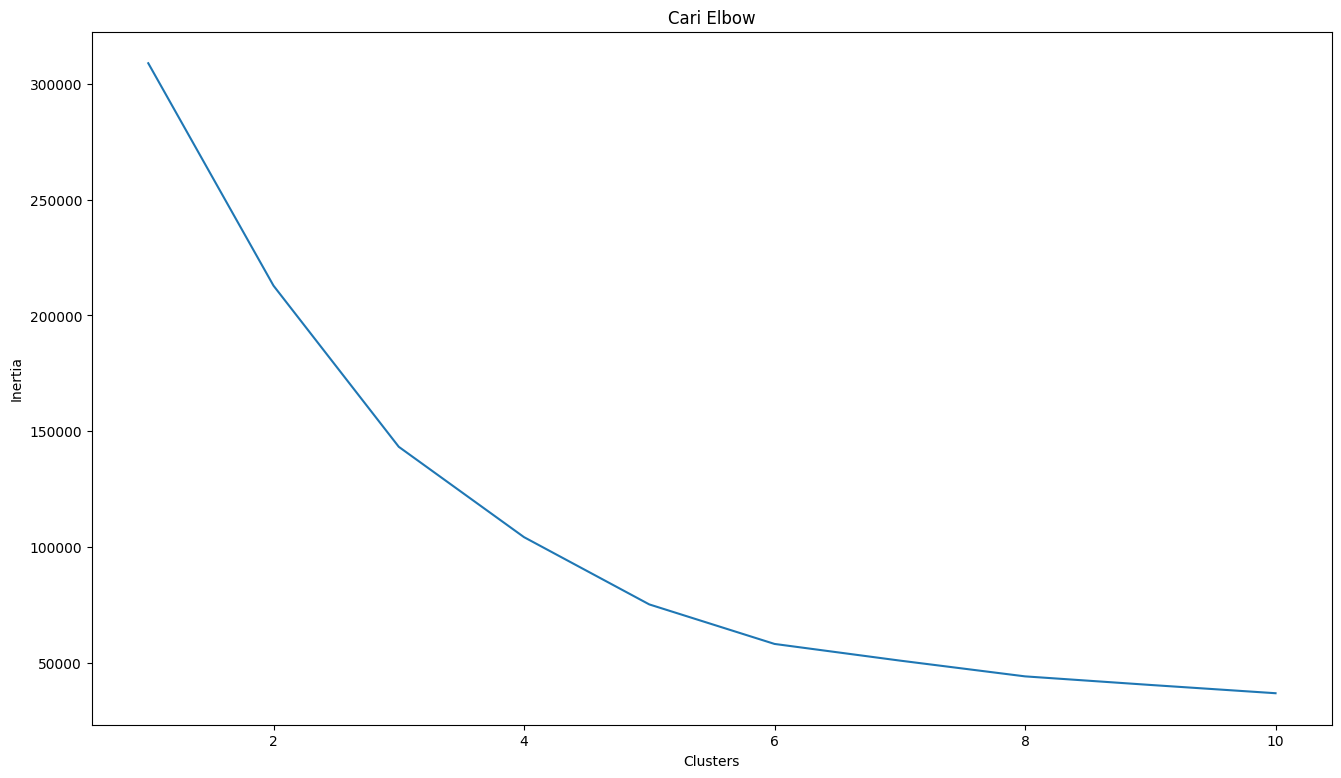

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Membuat plot inertia
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


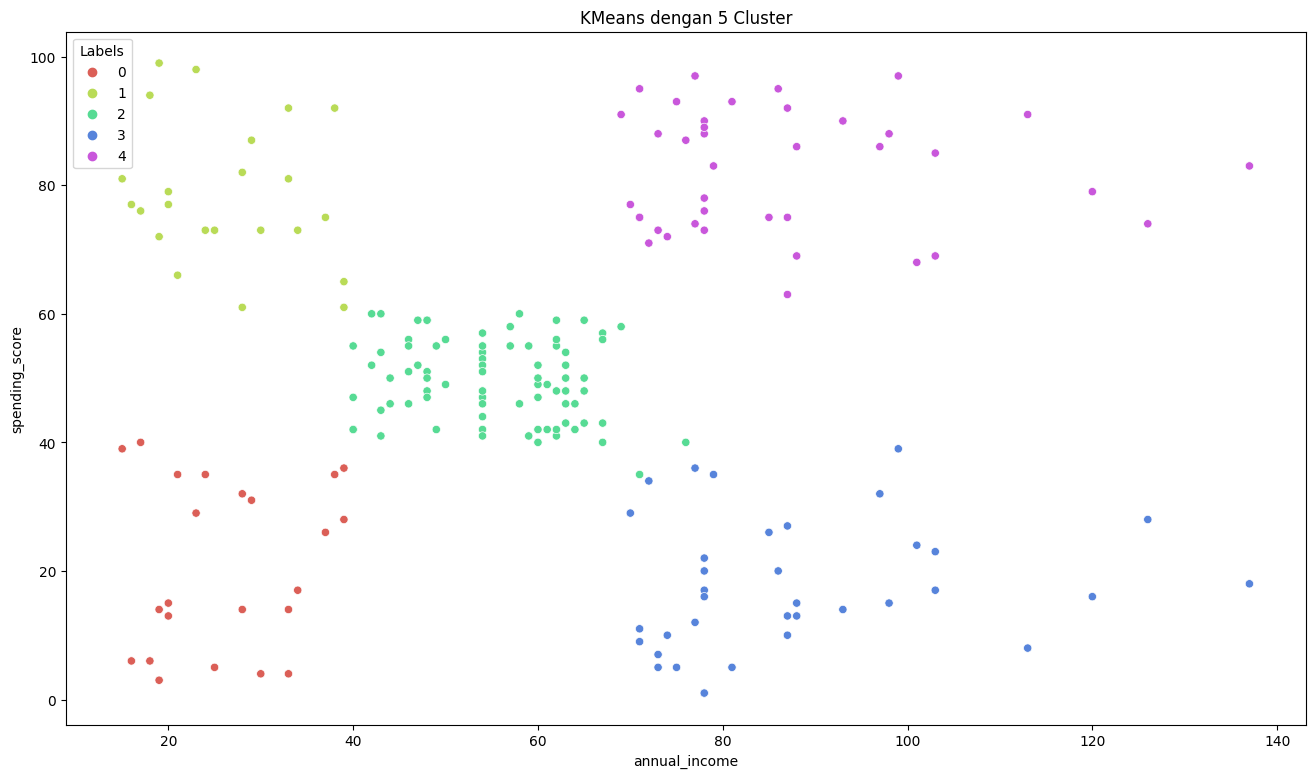

In [5]:
# Membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# Menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# Membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(16, 9))
sns.scatterplot(data=X, x='annual_income', y='spending_score', hue='Labels', palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()